## Analyzing Health Insurance Charges: Data Cleaning and Visualization

This notebook focuses on exploratory data analysis (EDA) and data cleaning of the health insurance dataset.Our goal is to uncover insights related to health insurance charges by examining key demographic factors and existing medical conditions.

The notebook covers:
- **Data Loading:** Importing the dataset and examining the data to understand its structure and contents.
- **Data Cleaning:** Identifying and handling missing values, checking data types, and detecting outliers that might skew our analysis.
- **Exploratory Data Analysis:** Visualizing trends and patterns by using various plots to understand the distribution of charges and relationships with demographic factors.
- **Insights:** Finally, we summarize our key findings and highlight significant trends that may inform future modeling efforts aimed at predicting health insurance charges.

By the end of this notebook, readers will have a clearer understanding of the dataset and the foundational groundwork necessary for developing a predictive model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
data = pd.read_csv('insurance.csv')

np.random.seed(42)
#the 'existing_medical_condition' column and  give a higher probability of 'No'
data['existing_medical_condition'] = np.random.choice(['Yes', 'No'], size=len(data), p=[0.1,0.9])

# People over 50 years old or with BMI > 30 have a higher chance of having an existing medical condition
data['existing_medical_condition'] = np.where(
    (data['age'] > 50) | (data['bmi'] > 30),
    np.random.choice(['yes', 'no'], size=len(data), p=[0.3, 0.7]),  # 30% chance for these people
    np.random.choice(['yes', 'no'], size=len(data), p=[0.05, 0.95])  # 5% chance for others
)

required_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges','existing_medical_condition']

missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")

missing_values = data.isnull().sum()

if missing_values.any():
    print("Missing values found:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found.")


# Check for duplicate rows
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Duplicate rows found: {duplicates}")
    data.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")
    
# Check for Outlier by using IQR method
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)]

if not outliers.empty:
    print(f"Outliers found in the dataset: {len(outliers)}")
    print(outliers[['charges']])  # Display the outliers in the 'charges' column
else:
    print("No outliers found in the dataset.")
    
print(f"\nSummary Statistics:")
print(data.describe(include='all'))

All required columns are present.
No missing values found.
No duplicate rows found.
Outliers found in the dataset: 139
          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]

Summary Statistics:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.2962

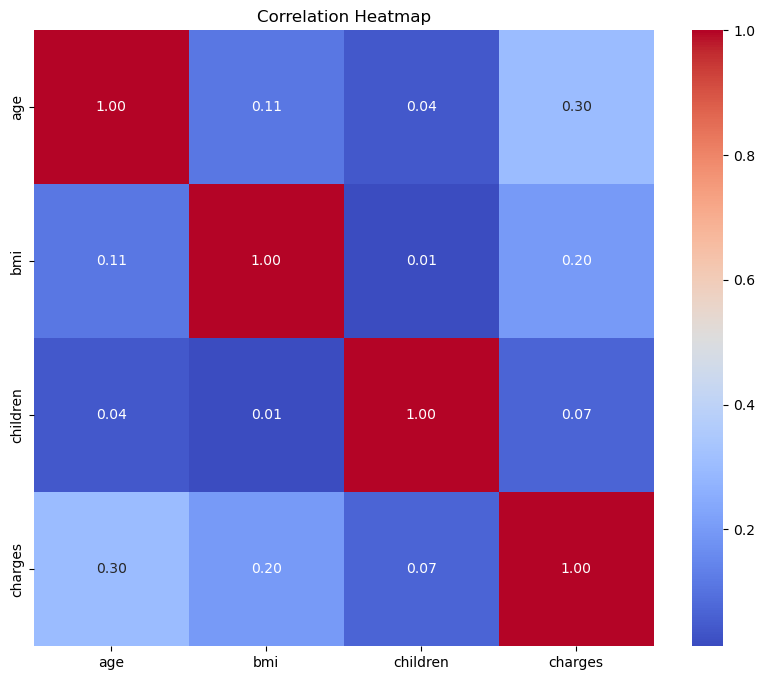

In [3]:
#Correlation Heat Map
plt.figure(figsize=(10,8))
correlation_matrix =  data.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

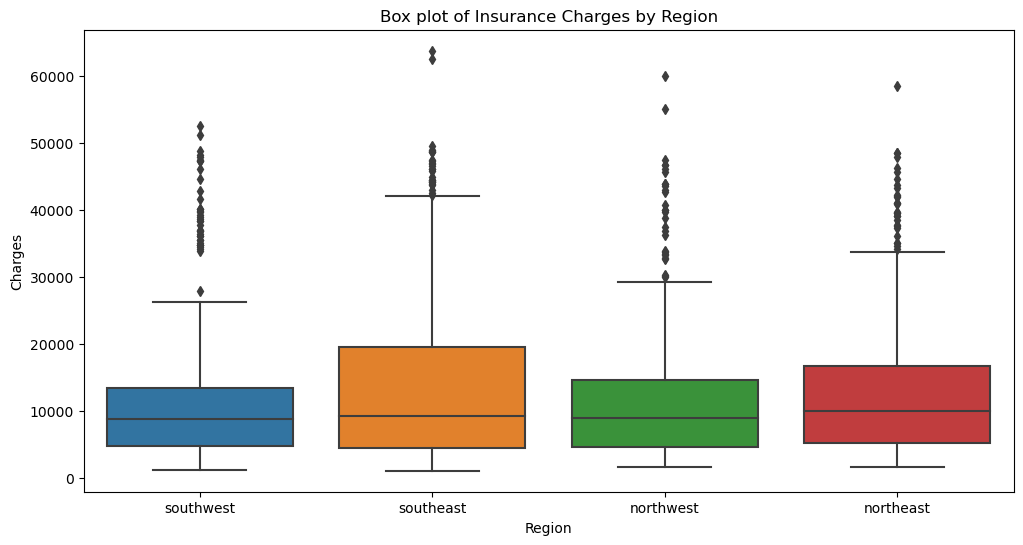

In [4]:
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Box plot of Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

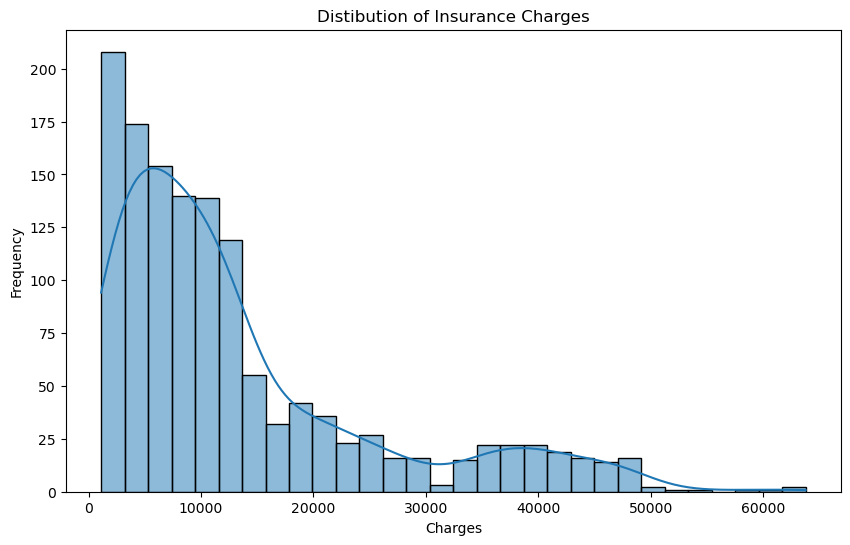

In [5]:
# Histogram of Distibution of Insurance Charges
plt.figure(figsize=(10,6))
sns.histplot(data['charges'], bins=30, kde=True)
plt.title('Distibution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

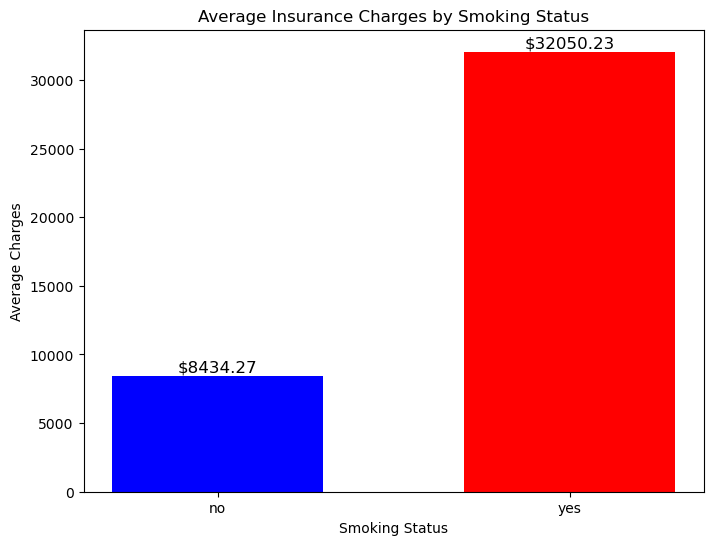

In [6]:
average_charges = data.groupby('smoker')['charges'].mean()
plt.figure(figsize=(8,6))
bars = plt.bar(average_charges.index, average_charges.values, color=['blue', 'red'], width=0.6)
plt.title('Average Insurance Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Charges')

for bar in bars:
    yval =  bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2, yval +50, f"${yval:.2f}", ha='center', va='bottom',fontsize=12)
plt.show()

This bar chart shows that non-smokers incur on average around 8,434.27 in charges, while smokers face a higher charge of around 32,050.23 on average. 

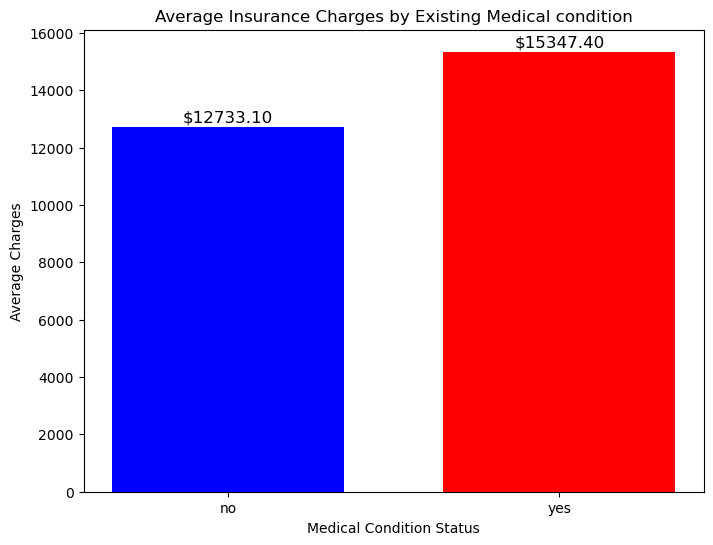

In [7]:
average_charges = data.groupby('existing_medical_condition')['charges'].mean()
plt.figure(figsize=(8,6))
bars = plt.bar(average_charges.index, average_charges.values, color=['blue', 'red'], width=0.7)
plt.title('Average Insurance Charges by Existing Medical condition')
plt.xlabel('Medical Condition Status')
plt.ylabel('Average Charges')

for bar in bars:
    yval =  bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2, yval +50, f"${yval:.2f}", ha='center', va='bottom',fontsize=12)
plt.show()

This bar chart shows that individuals without an existing medical condition, incur, on average charges of approximately 12,733.10, while those with existing medical conditions incur on average charges of around 15,347.40.

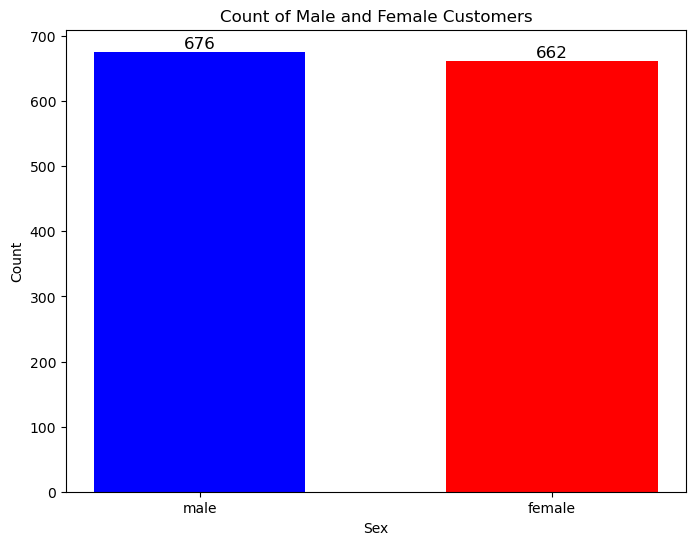

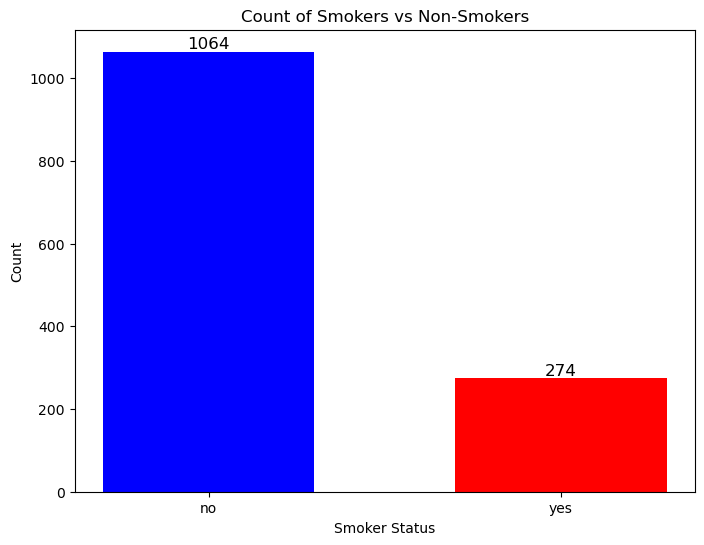

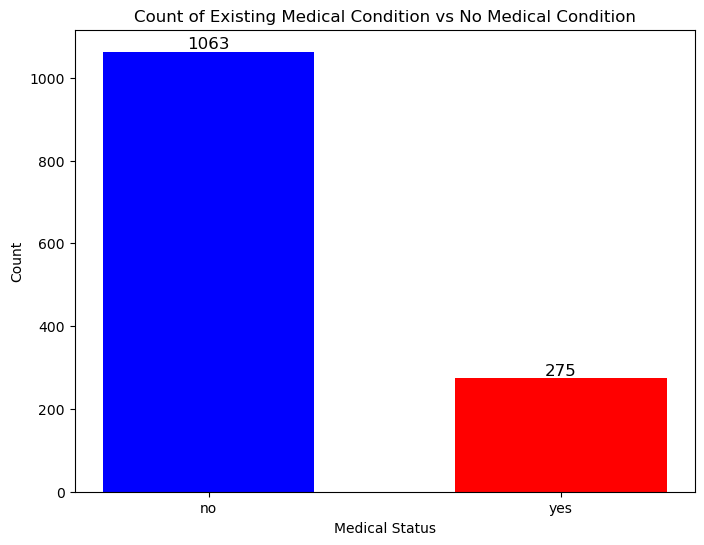

In [8]:
#Bar graph for count of male and female customers
category_counts = data['sex'].value_counts()
x= category_counts.index
height = category_counts.values
colors = ['blue', 'red']
plt.figure(figsize=(8,6))
bars = plt.bar(x, height ,color=colors, width=0.6)
plt.title('Count of Male and Female Customers')
plt.xlabel('Sex')
plt.ylabel('Count')

#Add the counts on top of each bar
for bar, h in zip(bars, height):
    plt.text(bar.get_x() + bar.get_width()/2.,h, f'{h}', ha='center', va='bottom', fontsize=12)

plt.show()

#Bar graph for smoker count
category_count = data['smoker'].value_counts()
x= category_count.index
height = category_count.values
plt.figure(figsize=(8,6))
bars2 = plt.bar(x,height, color=colors, width=0.6)
plt.title('Count of Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
for bar, h in zip(bars2, height):
    plt.text(bar.get_x() + bar.get_width()/2.,h, f'{h}', ha='center', va='bottom', fontsize=12)
plt.show()

#Bar graph for mdeical condition count
category_count1 = data['existing_medical_condition'].value_counts()
x= category_count1.index
height = category_count1.values
plt.figure(figsize=(8,6))
bars3 = plt.bar(x,height, color=colors, width=0.6)
plt.title('Count of Existing Medical Condition vs No Medical Condition')
plt.xlabel('Medical Status')
plt.ylabel('Count')
for bar, h in zip(bars3, height):
    plt.text(bar.get_x() + bar.get_width()/2.,h, f'{h}', ha='center', va='bottom', fontsize=12)
plt.show()


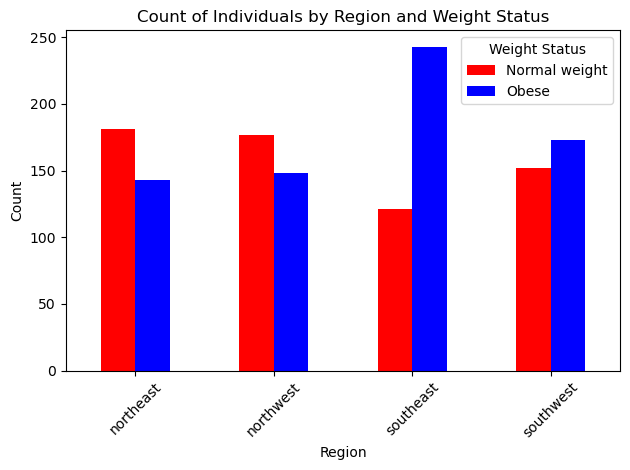

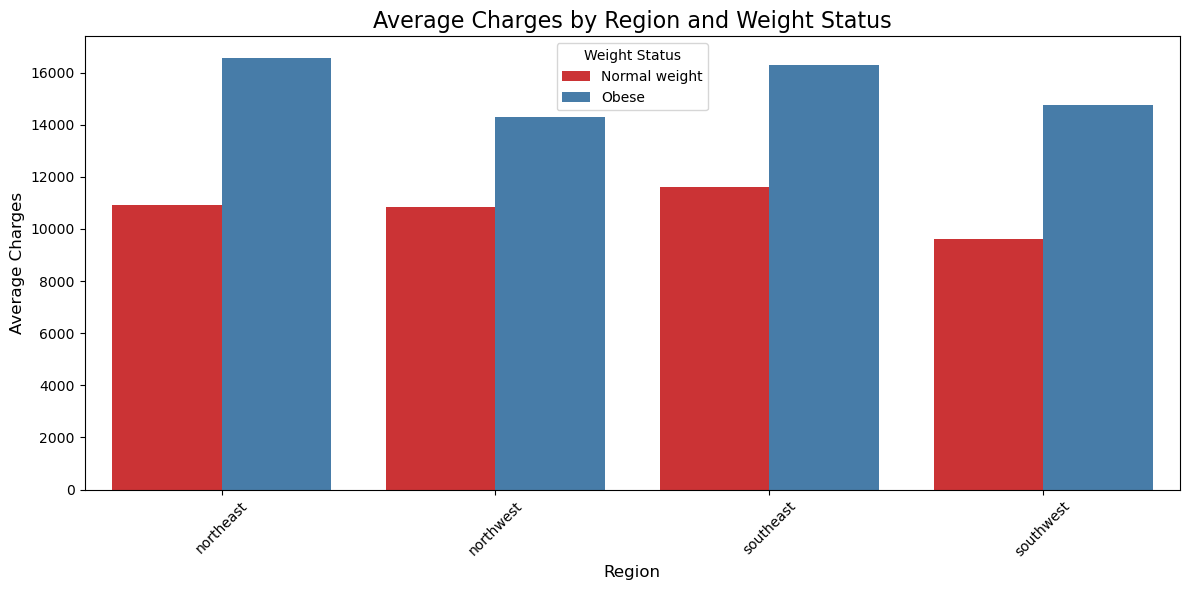

In [9]:
#create a new column 'weight_status' based on BMI
def classify_weight(bmi):
    if bmi >= 30:
        return 'Obese'
    else:
        return 'Normal weight'
    
data['weight_status'] = data['bmi'].apply(classify_weight)

region_weight_status = data.groupby(['region','weight_status']).size().unstack()
region_weight_status.plot(kind='bar', stacked=False, color=['red','blue'])
#Plot the bar chart the count of individuals by region and weight status
plt.title('Count of Individuals by Region and Weight Status')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Weight Status')
plt.tight_layout()
plt.show()


# Group by region and weight status, then calculate mean charges
charges_by_region_weight = data.groupby(['region', 'weight_status'])['charges'].mean().reset_index()

# Plot the bar chart for average charges for BMI in regions
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', hue='weight_status', data=charges_by_region_weight, palette='Set1')
plt.title('Average Charges by Region and Weight Status', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.legend(title='Weight Status')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

For both bar charts, starting with the Northeast region, we observe that more individuals are of normal weight, and their average insurance charges are lower compared to those who are obese. This trend is consistent across most regions. Notably, in the Southeast region, the first bar chart highlights that a larger proportion of individuals are obese compared to other regions.

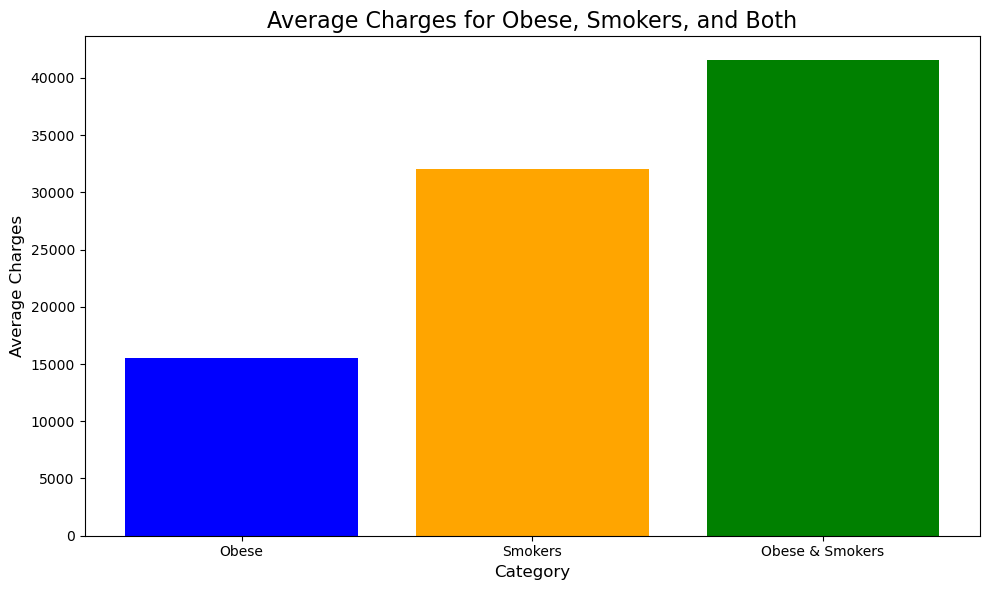

In [10]:
obese = data[data['bmi'] >= 30]
smokers = data[data['smoker'] == 'yes']
obese_smokers = data[(data['bmi'] >= 30) & (data['smoker'] == 'yes')]

# Calculate average charges for obese, smokers, and both obese + smokers
avg_charges_obese = obese['charges'].mean()
avg_charges_smokers = smokers['charges'].mean()
avg_charges_obese_smokers = obese_smokers['charges'].mean()

categories = ['Obese', 'Smokers', 'Obese & Smokers']
avg_charges = [avg_charges_obese, avg_charges_smokers, avg_charges_obese_smokers]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, avg_charges, color=['blue', 'orange', 'green'])
plt.title('Average Charges for Obese, Smokers, and Both', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)
plt.tight_layout()
plt.show()

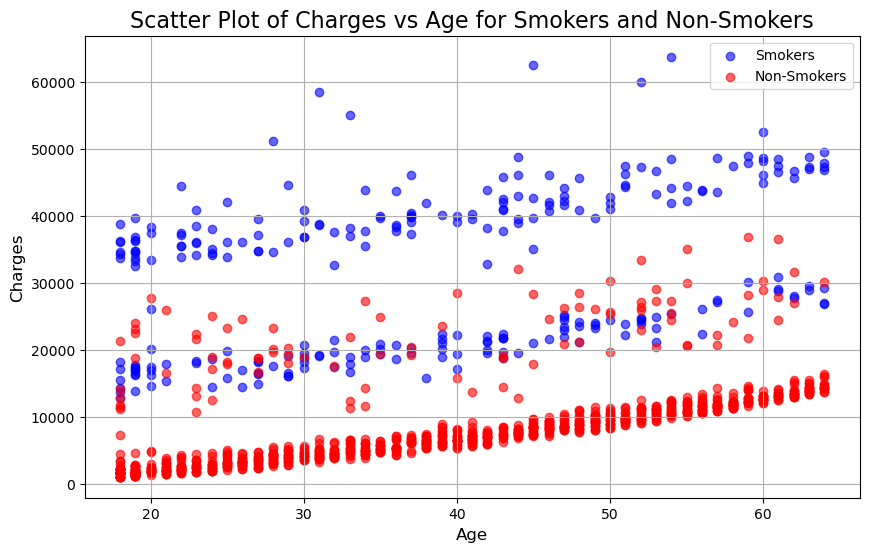

In [11]:
#Scatter plot for showing the relationship between charges and age only for smokers
smoker_data = data[data['smoker']== 'yes']
non_smoker_data = data[data['smoker']=='no']
plt.figure(figsize=(10,6))
plt.scatter(smoker_data['age'], smoker_data['charges'], color='blue', alpha=0.6, label='Smokers')
plt.scatter(non_smoker_data['age'], non_smoker_data['charges'], color='red',alpha=0.6, label='Non-Smokers')
plt.title('Scatter Plot of Charges vs Age for Smokers and Non-Smokers', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

As the age increases, smokers face higher insurance costs which indicates that older smokers will typically incur higher insurance costs.

For non-smokers there is a increase in charges with age,but at a much lower rate.Therefore non-smokers face signficantly lower charges across all age groups.

Therefore,there is a postive correlation between age and insurance charges, particularly for smokers, which shows that age is determining factor for insurance charges.

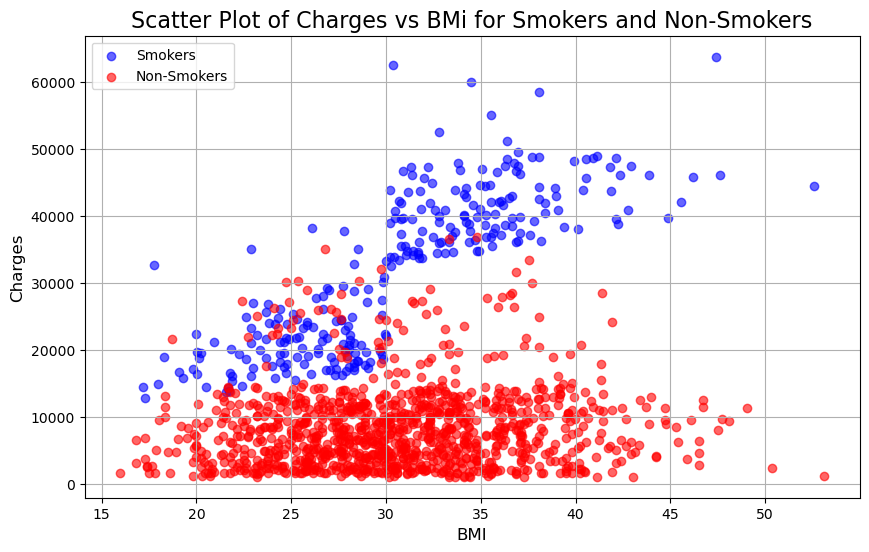

In [12]:
#Scatter plot for showing the relationship between charges and BMI
smoker_data = data[data['smoker']== 'yes']
non_smoker_data = data[data['smoker']=='no']
plt.figure(figsize=(10,6))
plt.scatter(smoker_data['bmi'], smoker_data['charges'], color='blue', alpha=0.6, label='Smokers')
plt.scatter(non_smoker_data['bmi'], non_smoker_data['charges'], color='red',alpha=0.6, label='Non-Smokers')
plt.title('Scatter Plot of Charges vs BMi for Smokers and Non-Smokers', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

Smokers with a BMI over 30 tend to incur significantly higher insurance costs, with insurance charges rising as the BMI increases. 

For non-smokers with a BMI over 30,have  much lower insurance charges, and while there is some increase in insurance charges as BMI increases, it is relatively low compared to smokers. This demonstrates that both smoking status and BMI are important factors which influence insurance costs.

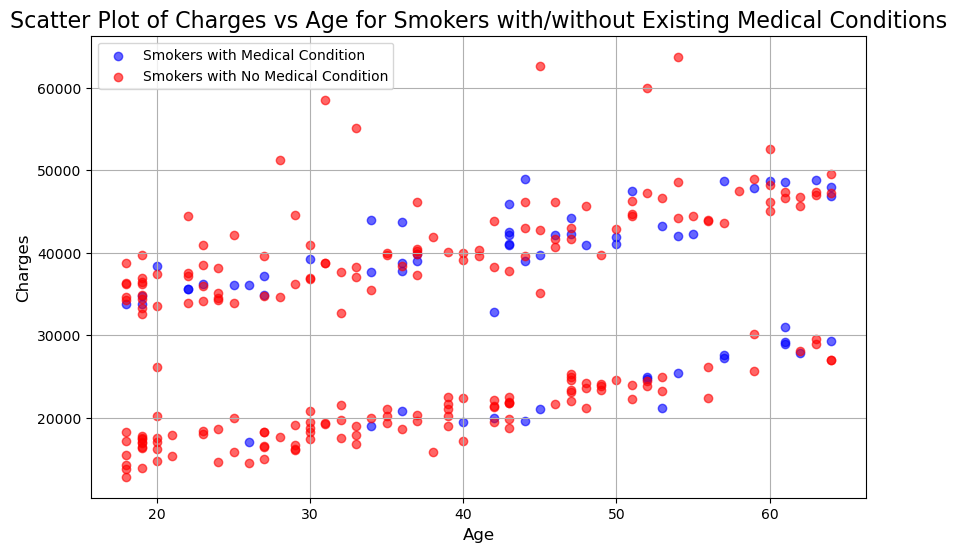

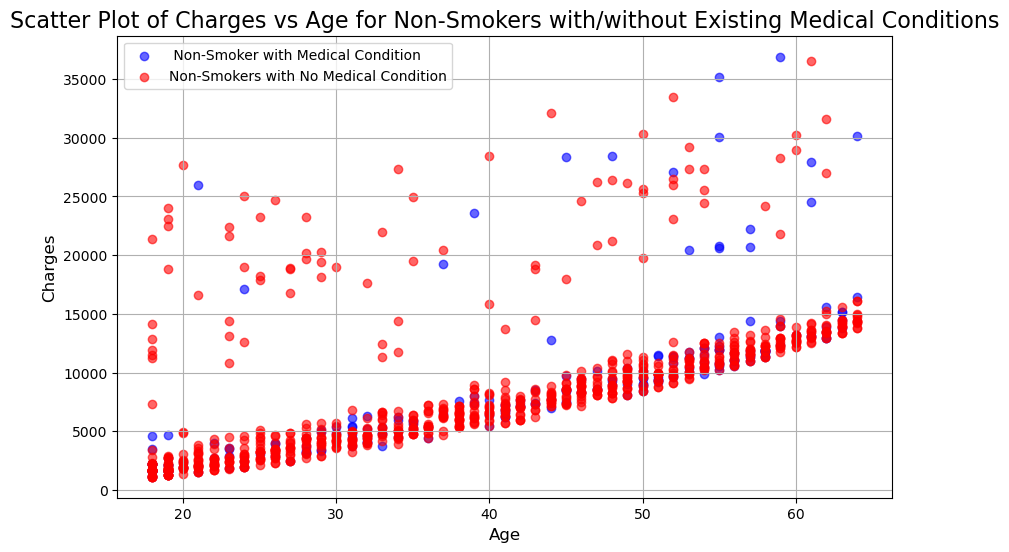

In [13]:
#Scatter plot for showing the relationship between charges and age only for smokers
smoker_medical_data = data[(data['smoker'] == 'yes') & (data['existing_medical_condition'] == 'yes')]
smoker_no_medical_data = data[(data['smoker'] == 'yes') & (data['existing_medical_condition'] == 'no')]                                                         
plt.figure(figsize=(10,6))                                                          
plt.scatter(smoker_medical_data['age'], smoker_medical_data['charges'], color='blue', alpha=0.6, label='Smokers with Medical Condition')
plt.scatter(smoker_no_medical_data['age'],smoker_no_medical_data['charges'], color='red',alpha=0.6, label='Smokers with No Medical Condition')
plt.title('Scatter Plot of Charges vs Age for Smokers with/without Existing Medical Conditions', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

#Scatter plot for showing the relationship between charges and age only for non-smokers
non_smoker_medical_data = data[(data['smoker'] == 'no') & (data['existing_medical_condition'] == 'yes')]
non_smoker_no_medical_data = data[(data['smoker'] == 'no') & (data['existing_medical_condition'] == 'no')]
                                                          
plt.figure(figsize=(10,6))
plt.scatter(non_smoker_medical_data['age'], non_smoker_medical_data['charges'], color='blue', alpha=0.6, label=' Non-Smoker with Medical Condition')
plt.scatter(non_smoker_no_medical_data['age'],non_smoker_no_medical_data['charges'], color='red',alpha=0.6, label='Non-Smokers with No Medical Condition')
plt.title('Scatter Plot of Charges vs Age for Non-Smokers with/without Existing Medical Conditions', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

We see from the first scatter plot,insurance charges tend to increase with age which indicates that age is major factor in determing insurance charges for smokers.The presence of a medical condition does not appear to drastically impact the insurance charges,as the cost for smokers with and without the medical condition seem to overlap across most age group.Lastly there is more variation in charges among smokers with medical conditions, mainly in older age groups.

In the second scatter plot, we observe that for non-smokers, both with and without a medical condition, insurance charges remain relatively low compared to smokers from the other scatter plot. There is a steady increase in charges for non-smokers without a medical condition, starting low and gradually rising as age increases.

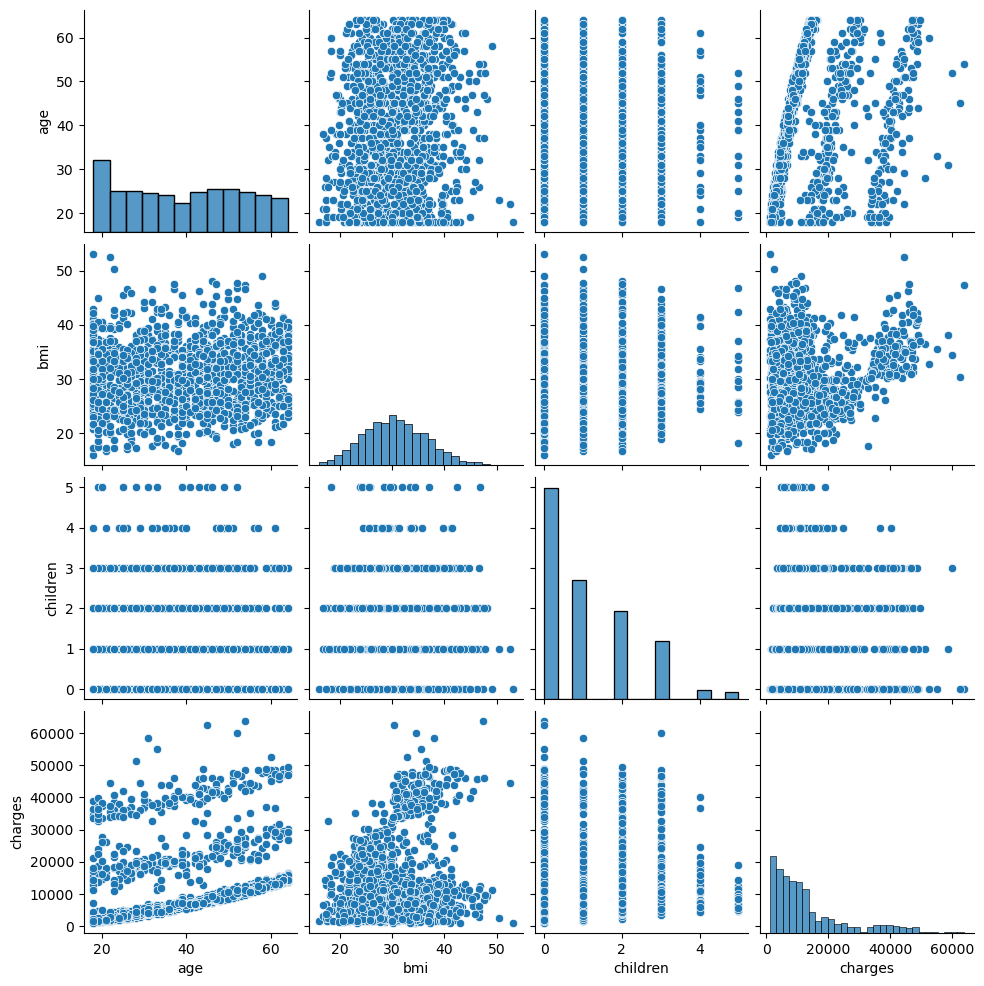

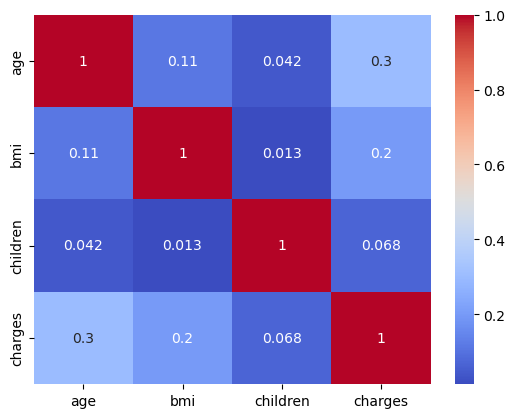

In [14]:
#Visualize relationships
sns.pairplot(data)
plt.show()
cor = data.select_dtypes(include='number').corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

## Conclusion 

Throughout this notebook, we analysed health insurance charges, focusing on data cleaning and visualization to identify patterns and trends. The three key steps we followed were: 

- **Cleaned the dataset** by checking and handling missing values,removing any duplicates and detecting outliers.
- **Explored relationships** between various factors such as age, BMI, smoking status, and the presence of existing medical conditions and insurance charges.
- **Visualized the data** using scatter plots, bar charts and other techniques, which helped highlight different trends such as:

     - **Age and Smoking** are the major dterminants of insurance charges,with older individuals and smokers facing significantly higher costs.

     - **BMI and Smoking** were also shown to impact charges,particularly for smokers with higher BMIs experience considerably higher costs.  

     - **Regional Variations** showed that the Southeast has a higher prevalence of obesity and higher insurance charges.

Therefore, through this analysis we can see that various factors influence health insurance costs such as age, smoking status and BMI. Interestingly, the new column added for existing medical conditions did not appear to drastically change the insurance charges for both non-smokers and smokers. Similarly, the impact of BMI on insurance costs was evident, so it needs a more in-depth dataset regarding what specific medical conditions, to provide more insights on how these will influence the cost regarding age, smoking status, BMI.
In the next notebook, we apply machine learning to develop more accurate predictive models for insurance charges and assess the ROI (Return on Investment) for the insurance company.